In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [4]:
data = loadmat('ex8data1.mat')
X = data['X']
X.shape

(307, 2)

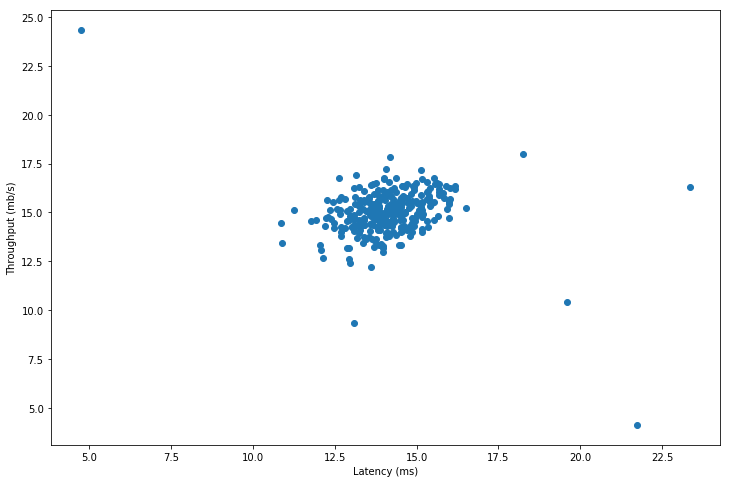

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
ax.scatter(X[:, 0], X[:, 1])

In [9]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [10]:
def gaussian_estimate(X):
    mu = X.mean(axis=0)
    sigma = X.var(axis=0)
    return mu, sigma

In [11]:
mu, sigma = gaussian_estimate(X)
mu, sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [12]:
Xval = data['Xval']
yval = data['yval']

Xval.shape, yval.shape

((307, 2), (307, 1))

In [15]:
from scipy import stats
dist = stats.norm(mu[0], sigma[0])
dist.pdf(15)

0.1935875044615038

In [17]:
dist.pdf(X[:, 0])[0:50]

array([0.183842  , 0.20221694, 0.21746136, 0.19778763, 0.20858956,
       0.21652359, 0.16991291, 0.15123542, 0.1163989 , 0.1594734 ,
       0.21716057, 0.21760472, 0.20141857, 0.20157497, 0.21711385,
       0.21758775, 0.21695576, 0.2138258 , 0.21057069, 0.1173018 ,
       0.20765108, 0.21717452, 0.19510663, 0.21702152, 0.17429399,
       0.15413455, 0.21000109, 0.20223586, 0.21031898, 0.21313426,
       0.16158946, 0.2170794 , 0.17825767, 0.17414633, 0.1264951 ,
       0.19723662, 0.14538809, 0.21766361, 0.21191386, 0.21729442,
       0.21238912, 0.18799417, 0.21259798, 0.21752767, 0.20616968,
       0.21520366, 0.1280081 , 0.21768113, 0.21539967, 0.16913173])

In [18]:
p = np.zeros((X.shape[0], X.shape[1]))
p[:, 0] = stats.norm(mu[0], sigma[0]).pdf(X[:, 0])
p[:, 1] = stats.norm(mu[1], sigma[1]).pdf(X[:, 1])
p.shape

(307, 2)

In [19]:
pval = np.zeros((X.shape[0], X.shape[1]))
pval[:, 0] = stats.norm(mu[0], sigma[0]).pdf(Xval[:, 0])
pval[:, 1] = stats.norm(mu[1], sigma[1]).pdf(Xval[:, 1])
pval.shape

(307, 2)

In [24]:
def threshold(pval, yval):
    best_epsilon = 0
    best_f1 = 0
    f1 = 0
    
    step = (pval.max() - pval.min())/1000
    
    for epsilon in np.arange(pval.min(), pval.max(), step):
        preds = pval < epsilon
        #Calculation for F1 function
        tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype(float)
        fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype(float)
        fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype(float)
        
        precision = tp/(tp + fp)
        recall = tp/(tp + fn)
        f1 = (2*precision*recall)/(precision + recall)
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon
            
    return best_epsilon, best_f1

In [26]:
epsilon, f1 = threshold(pval, yval)
epsilon, f1

/home/rajat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


(0.009566706005956842, 0.7142857142857143)

In [27]:
outliers = np.where(p < epsilon)
outliers

(array([300, 301, 301, 303, 303, 304, 306, 306]),
 array([1, 0, 1, 0, 1, 0, 0, 1]))

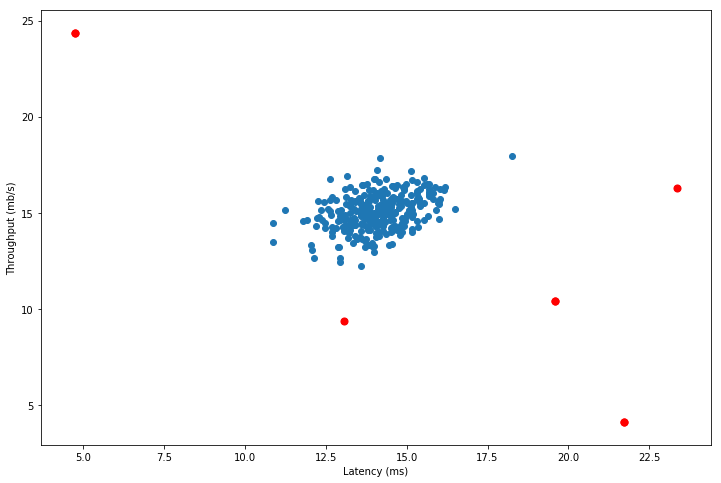

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
ax.scatter(X[:, 0], X[:, 1])
# Marking Outliers in Red
ax.scatter(X[outliers[0],0], X[outliers[0],1], s=50, color='r', marker='o')